# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Import algoritma klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Konfigurasi visualisasi
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

5 baris pertama dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null  

None


Distribusi label (Cluster):


Cluster
1    6114
2    1561
0    1275
Name: count, dtype: int64

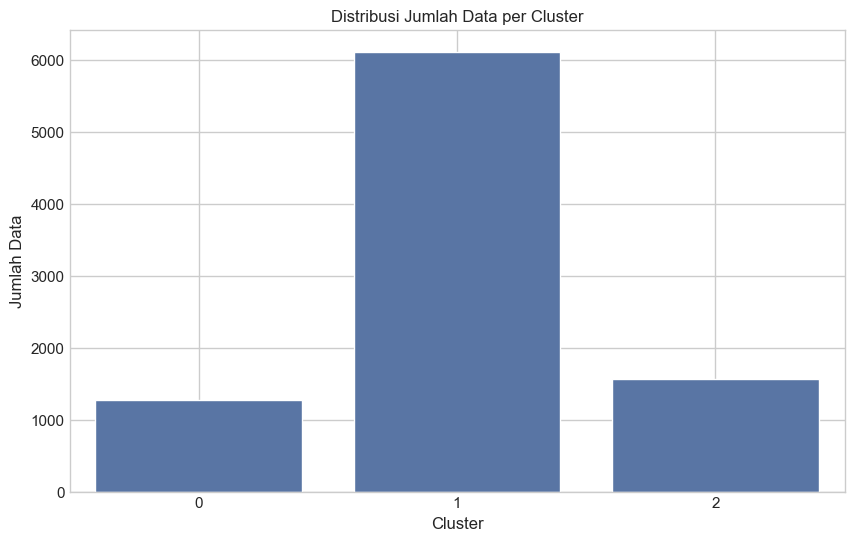


Statistik dasar berdasarkan cluster:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
Cluster                               0
dtype: int64

In [4]:
# Membaca dataset hasil clustering
df = pd.read_csv('dataset/CC_GENERAL_with_clusters.csv')

# Menampilkan 5 baris pertama
print("5 baris pertama dataset:")
display(df.head())

# Memeriksa informasi dataset
print("\nInformasi dataset:")
display(df.info())

# Memeriksa distribusi label (cluster)
print("\nDistribusi label (Cluster):")
cluster_distribution = df['Cluster'].value_counts()
display(cluster_distribution)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.show()

# Memeriksa statistik dasar
print("\nStatistik dasar berdasarkan cluster:")
display(df.isnull().sum())

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Memisahkan fitur dan target
X = df.drop(['CUST_ID', 'Cluster'], axis=1)  # Fitur
y = df['Cluster']  # Target

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek proporsi kelas pada training dan testing set
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")
print("\nDistribusi kelas pada training set:")
display(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribusi kelas pada testing set:")
display(pd.Series(y_test).value_counts(normalize=True))

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk mempertahankan nama kolom
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nData training setelah scaling:")
display(X_train_scaled.head())

Jumlah data training: 7160
Jumlah data testing: 1790

Distribusi kelas pada training set:


Cluster
1    0.683101
2    0.174441
0    0.142458
Name: proportion, dtype: float64


Distribusi kelas pada testing set:


Cluster
1    0.683240
2    0.174302
0    0.142458
Name: proportion, dtype: float64


Data training setelah scaling:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.549558,0.129785,4.312115,0.326939,10.019289,-0.463708,0.651143,1.552655,0.554039,-0.673337,-0.472684,1.032074,4.072507,2.803626,-0.061723,0.725827,0.360405
1,0.074014,0.515589,-0.204940,-0.250922,-0.019549,-0.463708,-0.085131,-0.071175,0.000919,-0.673337,-0.472684,-0.150056,-0.545260,-0.430433,-0.112821,-0.523812,-0.390176
2,2.409549,0.515589,-0.445625,-0.349344,-0.423140,-0.463708,-1.010191,-0.680110,-0.704785,-0.673337,-0.472684,-0.544099,2.442707,0.119438,0.370011,-0.523812,0.360405
3,-0.217648,0.515589,-0.462098,-0.349344,-0.463841,-0.454636,-1.217857,-0.680110,-0.914588,-0.257797,-0.326191,-0.583503,-0.898383,-0.516924,-0.228583,-0.523812,0.360405
4,-0.502164,0.515589,-0.085916,0.129366,-0.463841,-0.463708,1.066477,2.389941,-0.914588,-0.673337,-0.472684,-0.150056,0.405457,0.198156,-0.243959,-0.523812,0.360405


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Evaluasi Model pada Data Training:

Random Forest:
Accuracy: 1.0000
F1 Score (weighted): 1.0000

Decision Tree:
Accuracy: 1.0000
F1 Score (weighted): 1.0000


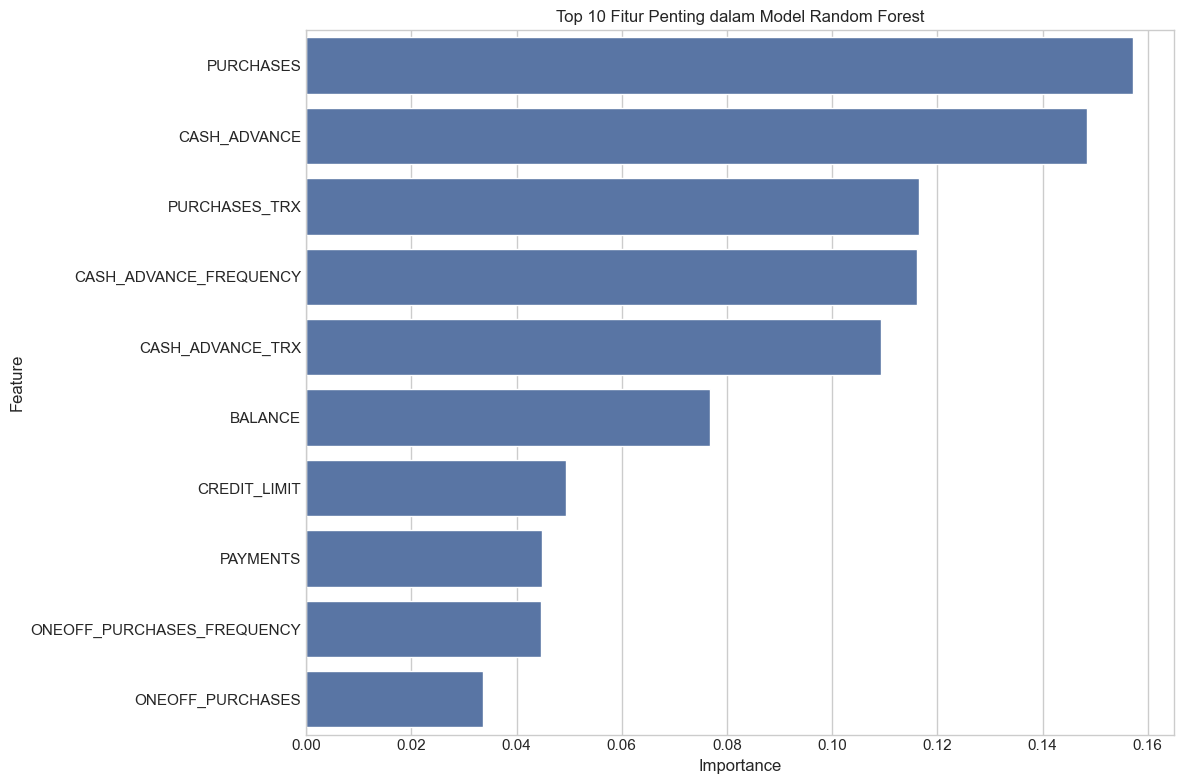


Top 10 fitur penting:


,Feature,Importance
2,PURCHASES,0.157135
5,CASH_ADVANCE,0.148382
11,PURCHASES_TRX,0.116586
9,CASH_ADVANCE_FREQUENCY,0.116103
10,CASH_ADVANCE_TRX,0.109301
0,BALANCE,0.076799
12,CREDIT_LIMIT,0.049482
13,PAYMENTS,0.044799
7,ONEOFF_PURCHASES_FREQUENCY,0.044645
3,ONEOFF_PURCHASES,0.033639


In [6]:
# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Evaluasi model pada data training
print("Evaluasi Model pada Data Training:")
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_train, rf_model.predict(X_train_scaled)):.4f}")
print(f"F1 Score (weighted): {f1_score(y_train, rf_model.predict(X_train_scaled), average='weighted'):.4f}")

print("\nDecision Tree:")
print(f"Accuracy: {accuracy_score(y_train, dt_model.predict(X_train_scaled)):.4f}")
print(f"F1 Score (weighted): {f1_score(y_train, dt_model.predict(X_train_scaled), average='weighted'):.4f}")

# Feature importance untuk Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Fitur Penting dalam Model Random Forest')
plt.tight_layout()
plt.show()

print("\nTop 10 fitur penting:")
display(feature_importance.head(10))

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model pada Data Testing:

Random Forest:
Accuracy: 0.9659
F1 Score (weighted): 0.9659

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       255
           1       0.98      0.98      0.98      1223
           2       0.93      0.97      0.95       312

    accuracy                           0.97      1790
   macro avg       0.95      0.95      0.95      1790
weighted avg       0.97      0.97      0.97      1790



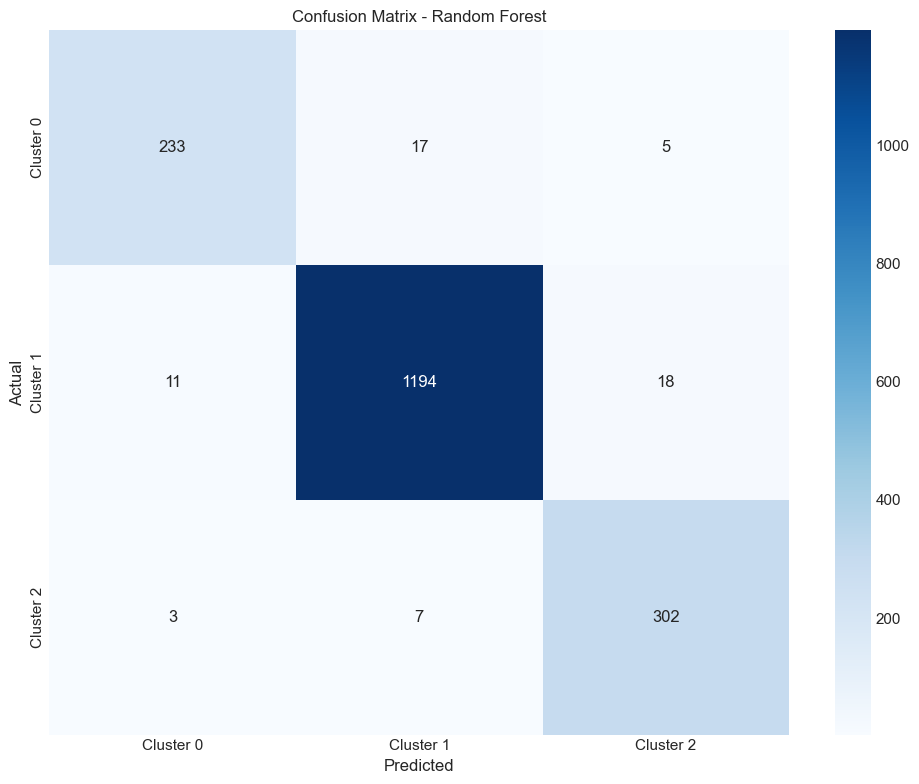


Decision Tree:
Accuracy: 0.9469
F1 Score (weighted): 0.9473

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       255
           1       0.97      0.96      0.97      1223
           2       0.89      0.94      0.91       312

    accuracy                           0.95      1790
   macro avg       0.92      0.93      0.93      1790
weighted avg       0.95      0.95      0.95      1790



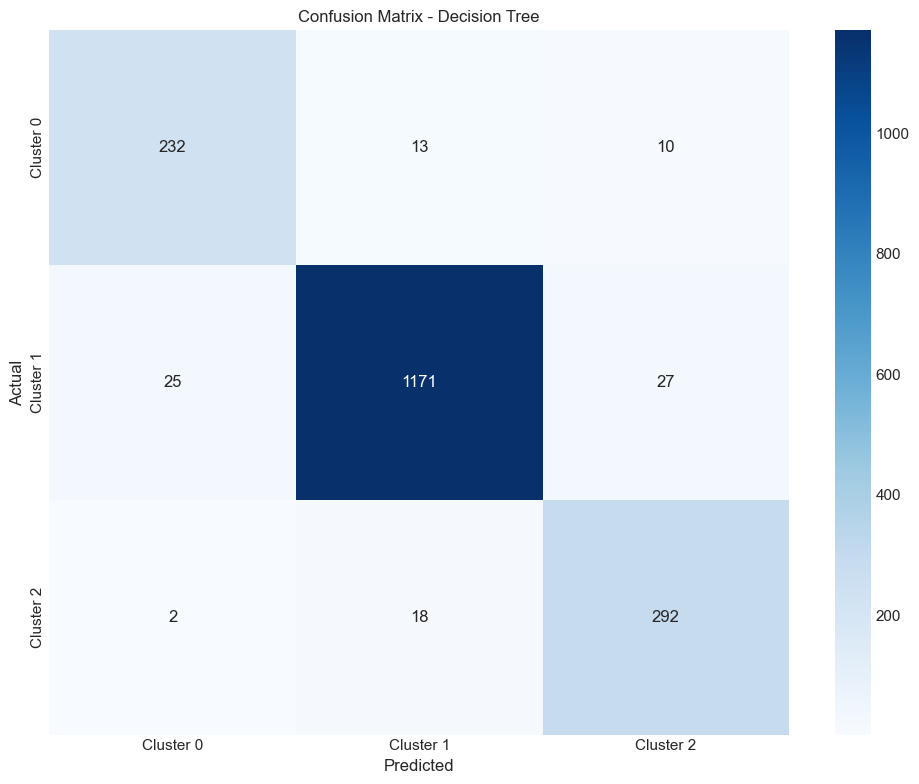


Cross-validation (5-fold):
Random Forest:
CV Accuracy: 0.9696 (±0.0016)

Decision Tree:
CV Accuracy: 0.9395 (±0.0045)


In [7]:
# Evaluasi model pada data testing
print("Evaluasi Model pada Data Testing:")

# Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix untuk Random Forest
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix untuk Decision Tree
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Cross-validation untuk lebih memvalidasi performa model
print("\nCross-validation (5-fold):")
print("Random Forest:")
cv_scores_rf = cross_val_score(RandomForestClassifier(random_state=42), X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std():.4f})")

print("\nDecision Tree:")
cv_scores_dt = cross_val_score(DecisionTreeClassifier(random_state=42), X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std():.4f})")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
# Grid Search untuk Random Forest
print("Melakukan hyperparameter tuning untuk Random Forest...")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, 
                             cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}")

# Menggunakan model terbaik dari grid search
best_rf_model = grid_search_rf.best_estimator_

# Grid Search untuk Decision Tree
print("\nMelakukan hyperparameter tuning untuk Decision Tree...")
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, 
                             cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.4f}")

# Menggunakan model terbaik dari grid search
best_dt_model = grid_search_dt.best_estimator_

Melakukan hyperparameter tuning untuk Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9712

Melakukan hyperparameter tuning untuk Decision Tree...
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.9415


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Model Terbaik pada Data Testing:

Random Forest (Tuned):
Accuracy: 0.9659
F1 Score (weighted): 0.9659

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       255
           1       0.98      0.98      0.98      1223
           2       0.93      0.97      0.95       312

    accuracy                           0.97      1790
   macro avg       0.95      0.95      0.95      1790
weighted avg       0.97      0.97      0.97      1790



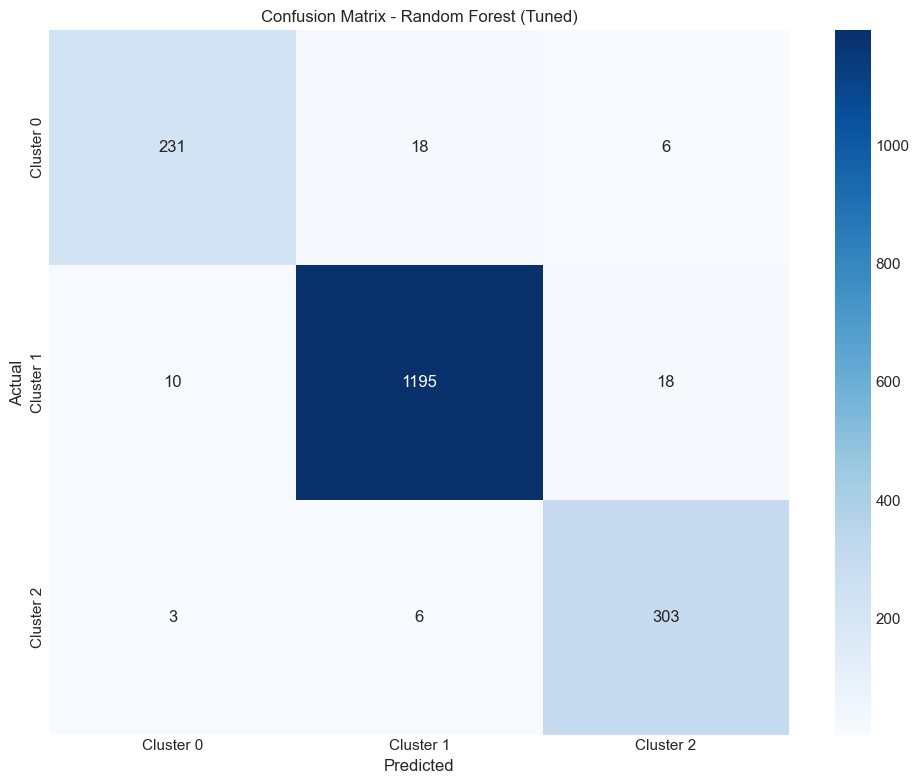


Decision Tree (Tuned):
Accuracy: 0.9385
F1 Score (weighted): 0.9386

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.96      0.96      0.96      1223
           2       0.90      0.89      0.89       312

    accuracy                           0.94      1790
   macro avg       0.91      0.91      0.91      1790
weighted avg       0.94      0.94      0.94      1790



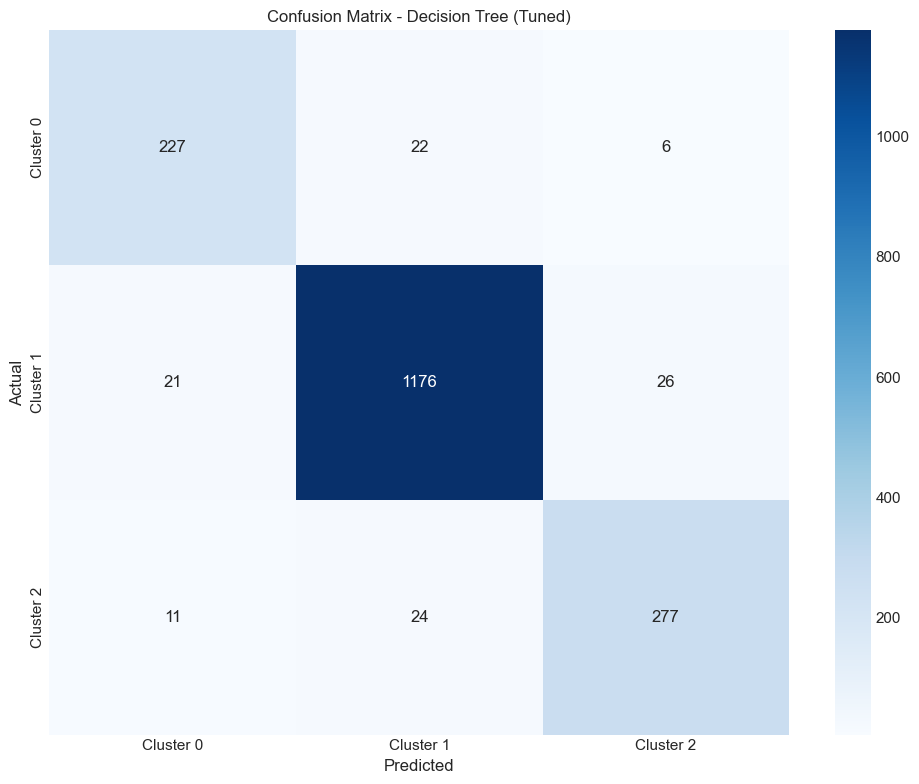


Perbandingan Performa Model:


,Model,Accuracy,F1 Score
0,Random Forest (Default),0.965922,0.965919
1,Random Forest (Tuned),0.965922,0.965887
2,Decision Tree (Default),0.946927,0.947258
3,Decision Tree (Tuned),0.938547,0.938577


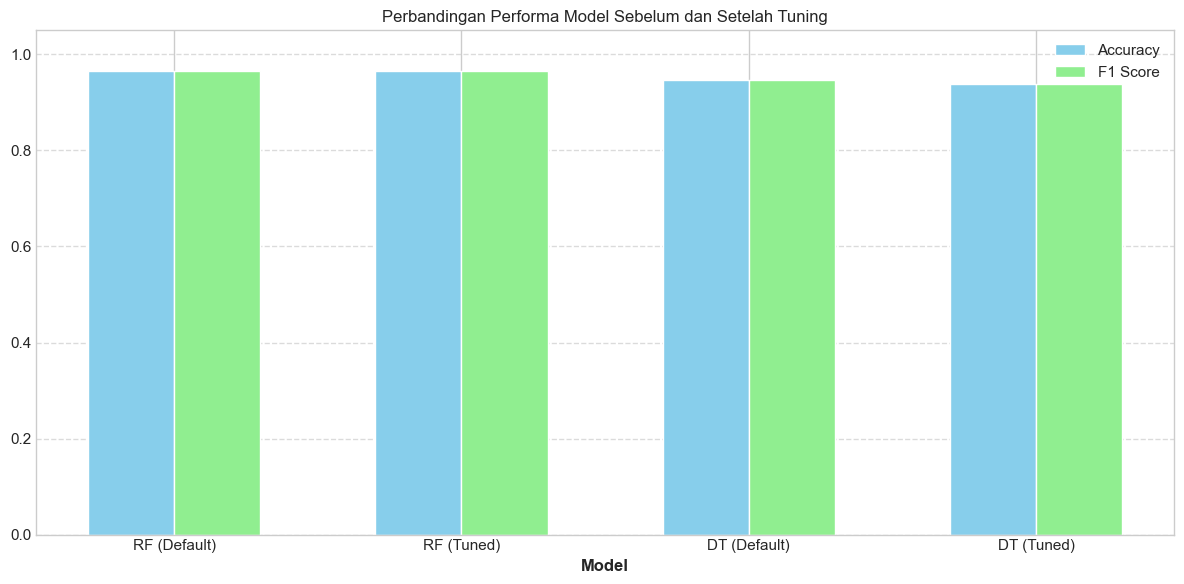

In [9]:
# Evaluasi model terbaik pada data testing
print("Evaluasi Model Terbaik pada Data Testing:")

# Random Forest terbaik
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print("\nRandom Forest (Tuned):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_best_rf, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix untuk Random Forest terbaik
plt.figure(figsize=(10, 8))
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Decision Tree terbaik
y_pred_best_dt = best_dt_model.predict(X_test_scaled)
print("\nDecision Tree (Tuned):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_best_dt, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))

# Confusion Matrix untuk Decision Tree terbaik
plt.figure(figsize=(10, 8))
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Perbandingan performa model sebelum dan setelah tuning
print("\nPerbandingan Performa Model:")
comparison_df = pd.DataFrame({
    'Model': ['Random Forest (Default)', 'Random Forest (Tuned)', 'Decision Tree (Default)', 'Decision Tree (Tuned)'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), 
                 accuracy_score(y_test, y_pred_best_rf),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_best_dt)],
    'F1 Score': [f1_score(y_test, y_pred_rf, average='weighted'),
                 f1_score(y_test, y_pred_best_rf, average='weighted'),
                 f1_score(y_test, y_pred_dt, average='weighted'),
                 f1_score(y_test, y_pred_best_dt, average='weighted')]
})

display(comparison_df)

# Visualisasi perbandingan performa
plt.figure(figsize=(12, 6))
barWidth = 0.3
r1 = np.arange(len(comparison_df['Model']))
r2 = [x + barWidth for x in r1]

plt.bar(r1, comparison_df['Accuracy'], width=barWidth, label='Accuracy', color='skyblue')
plt.bar(r2, comparison_df['F1 Score'], width=barWidth, label='F1 Score', color='lightgreen')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(comparison_df['Model']))], ['RF (Default)', 'RF (Tuned)', 'DT (Default)', 'DT (Tuned)'])
plt.ylim(0, 1.05)
plt.title('Perbandingan Performa Model Sebelum dan Setelah Tuning')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.